Tutorial taken from https://www.lucypark.kr/courses/2015-ba/text-mining.html

In [2]:
!pip install gensim #topic modeling/calculating similarities btw docs
!pip install konlpy #Korean text analysis
!pip install twython #easier access to Twitter API
!pip install nltk # text analysis module


# 1.  Read document

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import codecs

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

file_list = drive.ListFile(
    {'q': os.environ['BTSlyrics_dir'] + " in parents"}).GetList()
 
with codecs.open('outfile.txt', 'w', encoding='utf-8') as g:
  for f in file_list[:-1]:
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = os.path.join(local_download_path, f['title'])
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)
    with codecs.open(fname, 'r', encoding='utf-8') as file:
      g.write(file.read() + '/n')

title: trivia_love.txt, id: 1nzIk4G9XYjbW--PoubTTkoJFiWSDWHCj
title: truth_untold.txt, id: 1hxT-DzayifPdAX-PtthGP9OkYLdXAeGe
title: whalien52.txt, id: 1XIf2O8YnSqzzFFhgvFPbK8w9a1KrWkf7
title: trivia_seesaw.txt, id: 14GVPxs8NG7jh5hG3KIewSPSW0M5uSmsl
title: trivia_just_dance.txt, id: 1NKwmaQTAaX1DFgUFUc3-G40VSRgRD4Du
title: young_forever.txt, id: 1Zly0LOmHRGzWOPeHQbozOU-hWN7_zpvd
title: silver_spoon.txt, id: 1oqwh-pWkMi8m42_hcuwysYz2wK5w-hmD
title: save_me.txt, id: 1Z66lgHs6Q6tvd2jqKYG13yGpieQgAUYm
title: idol.txt, id: 1weDJXv0KzNBZx12aAQjUUjz4VYAJtjzM
title: im_fine.txt, id: 1nmUdZSQn7zFDh6qD5GlgPW8mBY6jSv1k
title: outro_wings.txt, id: 1WIClck6un5lMz38NX2d5DsNI00QGuBLi
title: mic_drop.txt, id: 171mKpw_OjKhNpObccOTb21tKOE4lII-p
title: run.txt, id: 1fqZ7P9uw1u6iAlQa8yV_gE4OzR15I8W7
title: not_today.txt, id: 1qOTSAWGkoObkiDJhpO6naYkg9uY7hpo3
title: pied_piper.txt, id: 1Qxj4dyHvA3SX3gGi2ApzVFWHNjmhkouX
title: i_need_you.txt, id: 15tRjUezMmn_3lIVKpoGeXKL4zW559rL9
title: love_maze.txt, id: 1M

In [0]:
from nltk.corpus import gutenberg   # Docs from project gutenberg.org
files_en = gutenberg.fileids()      # Get file ids
doc_en = gutenberg.open('austen-emma.txt').read()

from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
#doc_ko = kobill.open('1809890.txt').read()
doc_ko = open('outfile.txt').read()

# 2. Tokenize

In [7]:
from nltk import regexp_tokenize
pattern = r'''(?x) ([A-Z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
tokens_en = regexp_tokenize(doc_en, pattern)

from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# 3. Load tokens with nltk.Text()

In [0]:
import nltk
en = nltk.Text(tokens_en)

ko = nltk.Text(tokens_ko, name='방탄')   # For Python 2, input `name` as u'유니코드'

In [0]:
print(len(en.tokens))       # returns number of tokens (document length)
print(len(set(en.tokens)))  # returns number of unique tokens
en.vocab()                  # returns frequency distribution

In [11]:
#-*- coding: utf-8 -*-
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                  # returns frequency distribution

13281
2367


FreqDist({'Is': 2,
          'this': 12,
          'love': 99,
          '\n': 1759,
          'Sometimes': 2,
          'I': 227,
          'know': 34,
          'don': 36,
          "'": 121,
          't': 61,
          '이': 205,
          '다음': 5,
          '가사': 1,
          '음': 2,
          '뭐라고': 1,
          '쓸까': 1,
          '너무': 26,
          '많은': 5,
          '말': 40,
          '날': 66,
          '돌': 1,
          '지만': 2,
          '내': 164,
          '마음': 10,
          '같은': 13,
          '게': 25,
          '하나': 8,
          '없어': 27,
          '그냥': 11,
          '느껴져': 2,
          '해': 85,
          '가': 132,
          '뜨고': 1,
          '나면': 1,
          '꼭': 3,
          '달이': 2,
          '뜨듯이': 1,
          '손톱': 1,
          '자라듯': 1,
          ',': 289,
          '겨울': 2,
          '오면': 1,
          '나무': 1,
          '들': 51,
          '한': 35,
          '올': 2,
          '옷': 1,
          '을': 148,
          '벗듯이': 1,
          '넌': 29,
          '나': 69

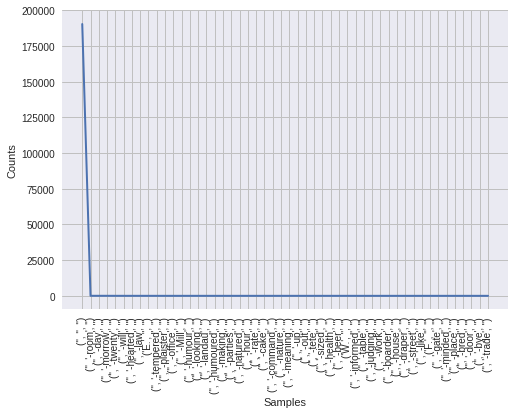

In [12]:
en.plot(50)

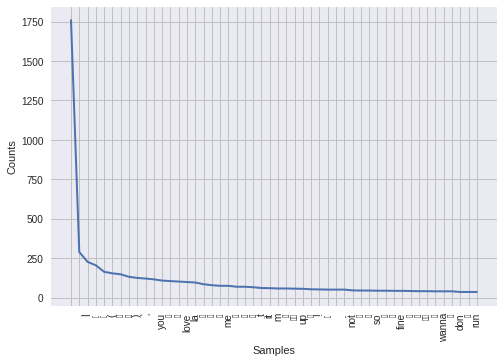

In [13]:
ko.plot(50)

In [25]:
ko.similar('사랑')

이 말 추억 심장 곳 손 숨 아픔 춤 눈물 없다면 밤 싫어 하늘 없었기에 등 온몸 발가벗은 용서 새벽


In [26]:
ko.collocations()

run run; fake love; Mic Drop; 태워라 Bow; 내밀어줘 save; lemme hear; 우연이
아니니까; Never never; Bow wow; young man; gotta make; never fall; wow
wow; lonely whale; ever ever; still want; love maze; Spread spread;
new generation; really wanna
